# HSE 2023: Mathematical Methods for Data Analysis

## Homework 1 

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make conclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test your solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 1. Python (2 points)

**Task 1** (0.5 points)<br/>
Enter nonzero numbers `a`, `d` and `N`. Find the sum of the first `N` members of [harmonic sequence](https://en.wikipedia.org/wiki/Harmonic_progression_(mathematics)) with the first member denominator `a`

In [2]:
def find_sum(a: int, d: int, N: int) -> float:
    shape = (1, N)
    result = np.fromfunction(lambda i, j: 1/(a + d*j), shape).sum()
    return result

a = int(input("Input a: "))
d = int(input("Input d: "))
N = int(input("Input N: "))
print("Sum: ", find_sum(a, d, N))

Input a:  1
Input d:  1
Input N:  10


Sum:  2.9289682539682538


**Task 2** (0.5 points) <br/>
Enter an integer number `N`. Check if it is a palindrome number **without converting it to the string**. It means that it can be read equally from left to right and from right to back.

In [3]:
def reverse_number(n):
    reversed_number = 0
    while n > 0:
        reversed_number = (reversed_number * 10) + (n % 10)
        n //= 10
    return reversed_number

def check_palindrome(n):
    if (n < 0):
      return False
    check_palindrome = (n == reverse_number(n))
    return check_palindrome

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/>
Find the first `N` palindrome numbers starting from 42 (you may use the function from the precious task).

In [4]:
def find_palindromes(N):
    palindromes = []
    num = 42
    while len(palindromes) < N:
      if (check_palindrome(num)):
        palindromes.append(num)
      num+=1
    return palindromes

print(find_palindromes(3))
print(find_palindromes(13))
print(find_palindromes(23))

[44, 55, 66]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161]
[44, 55, 66, 77, 88, 99, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 202, 212, 222, 232, 242, 252, 262]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the median number.

In [5]:
from random import randint

def find_median(a, b, c):
    if a > b:
      if (b > c):
        return b
      elif a > c:
        return c
      else:
        return a
    else:
      if a > c:
        return a
      elif b > c:
        return c
      else:
        return b

for i in range(10):
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMedian:', find_median(a, b, c))

45 70 -59 	Median: 45
21 -46 -4 	Median: -4
-67 -9 -33 	Median: -33
39 38 -16 	Median: 38
7 -31 49 	Median: 7
-21 40 -94 	Median: -21
96 90 -11 	Median: 90
88 -100 -95 	Median: -95
40 98 49 	Median: 49
6 36 19 	Median: 19


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array from Gaussian distribution with length of 12 and with sum of its elements equal to 15. Distribution shall be left Gaussian

In [6]:
my_array = np.random.randn(12)

origin_sum = np.sum(my_array)
coef = 15 / origin_sum

my_array *= coef

print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 12
Sum of elements: 15.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length.

Calculate the following distances between the arrays **without using any special function. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [7]:
def calculate_manhattan(a, b):
    distance = np.sum(np.abs(a - b))
    return distance

def calculate_euclidean(a, b):
    distance = np.sqrt(np.sum((a - b)**2))
    return distance

def calculate_chebyshev(a, b):
    distance = np.max(np.abs(a-b))
    return distance

def calculate_cosine(a, b):
    distance = 1 - a.dot(b) / (np.sqrt(a.dot(a)) * np.sqrt(b.dot(b)))
    return distance

In [8]:
length = int(input("Input length: "))
a = np.random.rand(length)
b = np.random.rand(length)
print("a: ", a)
print("b:", b)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Input length:  5


a:  [0.77749941 0.75938042 0.13958317 0.88160849 0.4658044 ]
b: [0.09489146 0.90675507 0.92135884 0.28894709 0.97147942]
Manhattan distance: 2.710094694009139
Euclidean distance: 1.3060631147149946
Chebyshev distance: 0.7817756721831537
Cosine distance: 0.3443713989378634


**Task 3** (0.5 points) <br/>
Create a random array of integers with length of 42. Transform the array so that
* Maximum element(s) value is 10
* Minimum element(s) value is -6
* Other values are in interval (-6; 10) without changing the relative order (relation $\frac{x_i}{x_{i-1}}=\frac{\widehat{x}_{i}}{\widehat{x}_{i-1}}$ holds)

In [9]:
def transform(array):
    arr_min = np.min(array)
    arr_max = np.max(array)
    std_array = (array - arr_min) / (arr_max - arr_min)
    transformed_array = std_array * (10 - (-6)) + (-6)
    return transformed_array

In [10]:
my_array = np.random.randint(-1000, 1001, 42)

print('Array before scaling:')
print(my_array)

print('Array after scaling:')
my_array = transform(my_array)
print(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')


Array before scaling:
[-686 -618 -121 -399  850  528 -241  517  918 -775   65  517  423 -526
 -815  588 -263  868 -616  -96  -89 -747 -962  230  446 -283 -239 -919
  416  313 -504  266  355  583  -48  372 -629 -484  321  300  185 -560]
Array after scaling:
[-3.65106383 -3.07234043  1.15744681 -1.20851064  9.4212766   6.68085106
  0.13617021  6.58723404 10.         -4.40851064  2.74042553  6.58723404
  5.78723404 -2.2893617  -4.74893617  7.19148936 -0.05106383  9.57446809
 -3.05531915  1.37021277  1.42978723 -4.17021277 -6.          4.14468085
  5.98297872 -0.2212766   0.15319149 -5.63404255  5.72765957  4.85106383
 -2.10212766  4.45106383  5.20851064  7.14893617  1.7787234   5.35319149
 -3.16595745 -1.93191489  4.91914894  4.74042553  3.76170213 -2.5787234 ]
Min: -6.0
Max: 10.0


**Task 4** (0.5 points) <br/>
Create an array with shape of $10 \times 3$ with integers from [-12, 4]. Find a column that contains the minimum element of the array.

In [11]:
my_array = np.random.randint(-12, 5, size=(10, 3))
selected_column = np.argmin(np.min(my_array, axis=0))
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (10, 3)
Array:
[[ -2  -1   0]
 [  3   3  -5]
 [ -9   2 -12]
 [ -4 -12 -10]
 [ -8  -6 -10]
 [-12  -9  -7]
 [  1  -7  -9]
 [ -4  -1  -2]
 [ -2 -12  -9]
 [ -3  -5  -5]]
Selected column: 0


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with the most appropriate quantile, explain why you chose it.

In [12]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.97710011 0.60906151 0.30544446        nan 0.65939789 0.62438121
 0.44393418        nan        nan 0.9587626 ]


Посчитаем 0.25, 0.5 и 0.75 квантили

In [13]:
quantiles = np.nanquantile(arr, [0.25, 0.5, 0.75])
quantiles

array([0.52649785, 0.62438121, 0.80908024])

In [14]:
def replace_missing(arr):
    median = np.nanmedian(arr)
    array_without_missing = np.where(np.isnan(arr), median, arr)
    return array_without_missing

In [15]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.97710011 0.60906151 0.30544446 0.62438121 0.65939789 0.62438121
 0.44393418 0.62438121 0.62438121 0.9587626 ]


In [16]:
quantiles = np.nanquantile(arr, [0.25, 0.5, 0.75])
quantiles

array([0.61289144, 0.62438121, 0.65064372])

**Answer:** Не имея явного понимания природы данных и зависимости, которые они отражают, наиболее подходящим квантилем для замены будет 0.5 квантиль, который также является медианой. Медиана представляется наиболее безопасной для подстановки, потому что она устойчива к выбросам, то есть не даёт экстремальным значениям повлиять на наши данные. 

Да, в данном задании на вход функции подаётся массив сгенерированный равномерным распределением и значениям в интервале от [0, 1] (по условию генерации данных функцией np.random.rand), но всё же для написания *универсальной* функции стоит исходить из того, что природа данных нам не известна. 

**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the median and std for every channel (you should get a vector of shape 3, RGB).

In [17]:
def stats_channel(X):
    median = np.median(X, axis=(0, 1))
    std = np.std(X, axis=(0, 1))
    return median, std

In [18]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(stats_channel(X))

(array([-3., -2., -2.]), array([5.39322131, 5.61177066, 5.43380022]))


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique values along the first axis.

Sample input:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7],
    [4, 5, 6]],

   [[7, 8, 9],
    [7, 8, 9],
    [7, 8, 9]]]
)
```
  
Sample output:

```
np.array(
  [[[1, 2, 3],
    [1, 2, 3]],

   [[4, 5, 6],
    [4, 5, 7]],

   [[7, 8, 9],
    [7, 8, 9]]]
)
```

In [19]:
def get_unique_values(X):
    result = np.unique(X, axis=1)
    return result

In [20]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique :')
get_unique_values(X)

Matrix:
[[[5 5 5]
  [4 5 5]
  [5 5 5]]

 [[5 5 5]
  [4 4 4]
  [4 4 5]]

 [[5 5 5]
  [5 4 4]
  [4 5 4]]

 [[5 4 4]
  [4 4 5]
  [4 4 5]]

 [[4 4 4]
  [4 4 4]
  [5 5 5]]

 [[4 4 4]
  [5 5 4]
  [4 5 5]]

 [[4 4 5]
  [4 5 4]
  [4 4 4]]

 [[4 5 4]
  [5 5 5]
  [4 5 4]]

 [[5 4 4]
  [5 4 5]
  [5 5 5]]

 [[5 5 4]
  [5 5 5]
  [5 4 4]]

 [[5 4 4]
  [5 4 4]
  [4 4 4]]

 [[4 5 4]
  [5 4 5]
  [4 4 5]]

 [[5 5 4]
  [5 5 4]
  [4 5 5]]

 [[5 4 4]
  [4 5 4]
  [5 4 5]]

 [[5 4 4]
  [5 4 4]
  [5 5 5]]

 [[4 4 4]
  [4 4 4]
  [5 4 4]]

 [[4 4 5]
  [4 4 4]
  [4 4 4]]

 [[5 5 5]
  [4 4 4]
  [5 4 5]]

 [[4 4 4]
  [4 4 4]
  [5 4 4]]]
Unique :


array([[[4, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[4, 4, 4],
        [4, 4, 5],
        [5, 5, 5]],

       [[5, 4, 4],
        [4, 5, 4],
        [5, 5, 5]],

       [[4, 4, 5],
        [4, 4, 5],
        [5, 4, 4]],

       [[4, 4, 4],
        [5, 5, 5],
        [4, 4, 4]],

       [[5, 5, 4],
        [4, 5, 5],
        [4, 4, 4]],

       [[4, 5, 4],
        [4, 4, 4],
        [4, 4, 5]],

       [[5, 5, 5],
        [4, 5, 4],
        [4, 5, 4]],

       [[5, 4, 5],
        [5, 5, 5],
        [5, 4, 4]],

       [[5, 5, 5],
        [5, 4, 4],
        [5, 5, 4]],

       [[5, 4, 4],
        [4, 4, 4],
        [5, 4, 4]],

       [[5, 4, 5],
        [4, 4, 5],
        [4, 5, 4]],

       [[5, 5, 4],
        [4, 5, 5],
        [5, 5, 4]],

       [[4, 5, 4],
        [5, 4, 5],
        [5, 4, 4]],

       [[5, 4, 4],
        [5, 5, 5],
        [5, 4, 4]],

       [[4, 4, 4],
        [5, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 5]]

# 3 Pandas & Visualization (4 points)

You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task won't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 6 rows

In [21]:
filename = "titanic.csv"
data =  pd.read_csv(filename)
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


### **Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many passenger classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every passenger class?
Please, write not only the answers but the code, proving it.

#### Are there any missing values? In what columns?

Всего в наши данных 891 запись c 12-ю признаками

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Выведем колонки в которых имеются пропущенные значения и процент пропущенных значений в них

In [55]:
missed_vals = (np.round(data.isna().sum()[data.isna().any()] / data.shape[0], 3)*100).to_frame()
missed_vals.reset_index(inplace=True)
missed_vals.columns = ['feature', 'missed %']
missed_vals

,feature,missed %
0,Age,19.9
1,Cabin,77.1
2,Embarked,0.2


Таким образом, мы видим, что пропущенные значения представлены в признаках Age, Cabin, Embarked. Количество пропущенных значений в колонке Cabin очень большое, в дальнейшем необходимо будет проверить корреляцию между данным признаком и таргетом, и принять решение - оставлять ли данный признак, произведя заполнения пропущенных значений, или убрать перед процессом обучения. Пропуском в колонке Age гораздо меньше, но при этом всё же не хотелось бы удалять 20% данных только из-за пропусков в данной колонке, поэтому необходимо будет произвести исследование на предмет возможной замены. А пропущенных значений в колонке Embarked очень мало, поэтому их можно будет просто убрать.  

#### What is the percentage of survived passengers? Are the classes balanced?

In [24]:
survived_distribution = np.round((data['Survived'].value_counts(normalize=True) * 100), 2).reset_index()
survived_distribution.columns = ['Survived', 'Percentage']
survived_distribution

,Survived,Percentage
0,0,61.62
1,1,38.38


К сожалению, мы видим, что по нашим данным почти 62% пассажиров Титаника не смогли выжить в данном крушении. Можем также сказать, что данный класс несбалансированный, и необходимо будет осуществить модификации, чтобы избежать проблем при обучении модели.  

#### Were there more males or females?

In [25]:
sex_distribution = np.round((data['Sex'].value_counts(normalize=True) * 100), 2).reset_index()
sex_distribution.columns = ['Sex', 'Percentage']
sex_distribution

,Sex,Percentage
0,male,64.76
1,female,35.24


В наших данных представлено больше информации о мужчинах, которых почти 65%, а женщин чуть больше 35%.

В условиях ДЗ не обозначено такой задачи, но можно посчитать, количество выживших женщин и мужчин, и обратное.

In [26]:
sex_survived_distribution = np.round((data[['Sex', 'Survived']].value_counts(normalize=True) * 100), 2).reset_index()
sex_survived_distribution.columns = ['Sex', 'Survived', 'Percentage']
sex_survived_distribution

,Sex,Survived,Percentage
0,male,0,52.53
1,female,1,26.15
2,male,1,12.23
3,female,0,9.09


Как мы видим, только 26% женщин и лишь 12% мужчин смогли выжить в данном крушении. 

#### What what the least popular port of embarkation?

In [27]:
port_distribution = np.round((data.dropna(subset=['Embarked'])['Embarked'].value_counts(normalize=True) * 100), 2).reset_index()
port_distribution.columns = ['Embarked', 'Percentage']
port_distribution

,Embarked,Percentage
0,S,72.44
1,C,18.90
2,Q,8.66


Наименее популярным портом для отправки был порт Queenstown.

#### How many passenger classes (pclass) were there on Tinanic?

In [28]:
port_distribution = (data['Pclass'].value_counts()).reset_index()
port_distribution.columns = ['Pclass', 'Count']
port_distribution

,Pclass,Count
0,3,491
1,1,216
2,2,184


Всего на Титанике было представлено 3 класса для пассажиров, наиболее популярным среди которых был класс 3 с 491 пассажиром, купившем подобный билет.

#### What is the overall average ticket fare? And for every passenger class?

In [29]:
np.round(np.mean(data['Fare']), 2)

32.2

Средняя стоимость билета среди всех классов была 32.2 единицы

In [30]:
price_distribution = np.round(data[['Pclass', 'Fare']].groupby('Pclass')['Fare'].mean(), 2).reset_index()
price_distribution

,Pclass,Fare
0,1,84.15
1,2,20.66
2,3,13.68


Наибольшая средняя стоимость билета представлена в 1 классе, она немного больше 84 единиц. Также можем видеть почему 3 класс был наиболее популярным, он просто является наиболее дешёвым. 

### **Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example).

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the median age? And among males and females separately? Visualize it on the separate plot
    * Make conclusions about what you see on the plots

#### What is the minimal and maximum ages of the passengers? Visualize it on the plot

In [31]:
min_age = np.min(data['Age'])
max_age = np.max(data['Age'])
print('Минимальный возраст: ', min_age)
print('Максимальный возраст: ', max_age)

Минимальный возраст:  0.42
Максимальный возраст:  80.0


In [32]:
data.loc[data['Age'].isin([max_age, min_age])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


Отличной новостью является то, что оба этих пассажира выжили!

Рассмотрим теперь общее распределение возраста пассажиров.

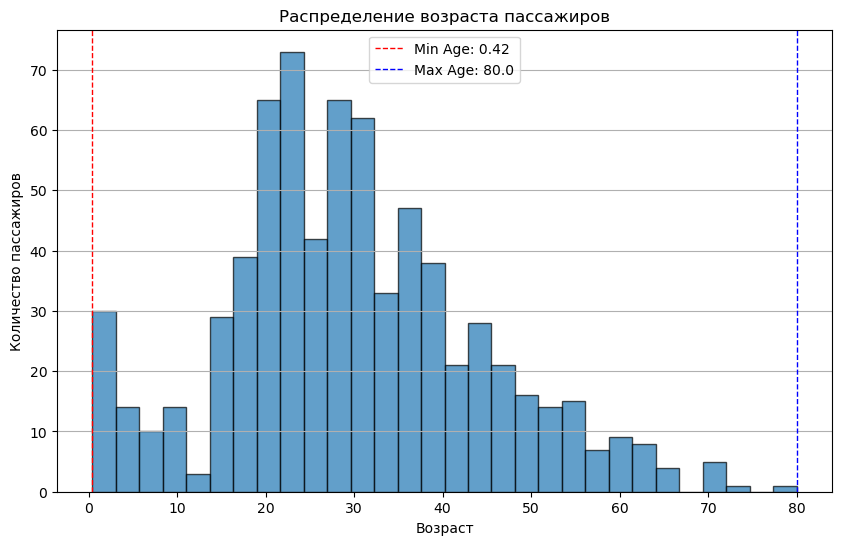

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.axvline(min_age, color='r', linestyle='dashed', linewidth=1, label=f'Min Age: {min_age}')
plt.axvline(max_age, color='b', linestyle='dashed', linewidth=1, label=f'Max Age: {max_age}')

plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.grid(axis='y')
plt.show()

#### What is the median age? And among males and females separately? Visualize it on the separate plot.
#### Make conclusions about what you see on the plots

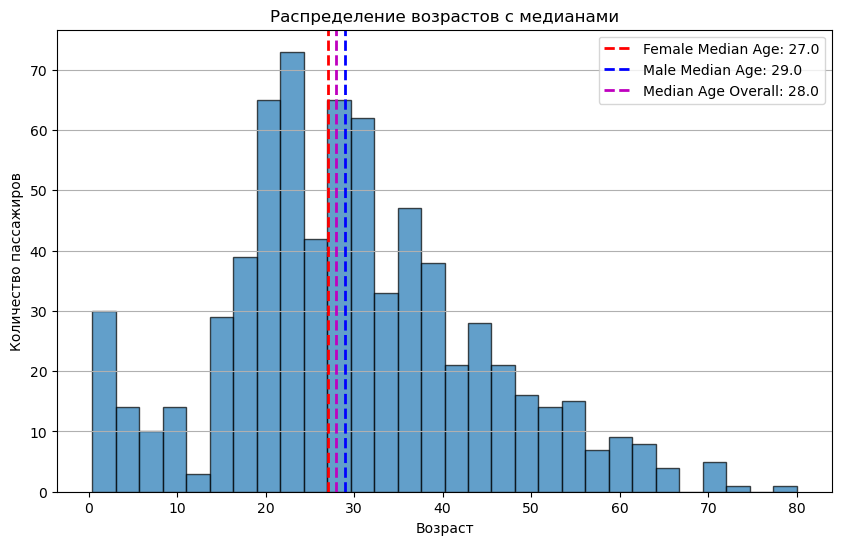

In [34]:
data_male = data.loc[data['Sex'] == 'male']
male_median_age = np.median(data_male['Age'].dropna())

data_female = data.loc[data['Sex'] == 'female']
female_median_age = np.median(data_female['Age'].dropna())

median_age = np.median(data['Age'].dropna())

plt.figure(figsize=(10, 6))
plt.hist(data['Age'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.axvline(female_median_age, color='r', linestyle='dashed', linewidth=2, label=f'Female Median Age: {female_median_age}')
plt.axvline(male_median_age, color='b', linestyle='dashed', linewidth=2, label=f'Male Median Age: {male_median_age}')
plt.axvline(median_age, color='m', linestyle='dashed', linewidth=2, label=f'Median Age Overall: {median_age}')

plt.title('Распределение возрастов с медианами')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.legend()
plt.grid(axis='y')
plt.show()

Общий медианный возраст: 28 лет.
Медианный возраст среди мужчин: 29 лет.
Медианный возраст среди женщин: 27 лет.

Можем сказать, что распределение возраста пассажиров на Титанике было достаточно большое, были как и младенцы, так и люди возраста до 80 лет. Несмотря на то, что медианный возраст мужчин и женщин не отличается сильно, мужчины на корабле были в среднем чуть старше женщин. Большинство пассажиров находилось в возрастной группе от 20 до 40 лет, что вероятно являлось наиболее подходящим возрастом для путешествия в те времена.

### **Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot and is not middle name.

#### How many are there unique titles?

In [35]:
titles = np.unique(data['Name'].apply(lambda name: re.search(' ([A-Za-z]+)\.', name).group(1)))
print("Количество уникальных титулов: ", len(titles))

Количество уникальных титулов:  17


#### How many are there passengers with every title?

In [36]:
passenger_title = data.loc[:, ['Name']]
passenger_title['Title'] = data['Name'].apply(lambda name: re.search(' ([A-Za-z]+)\.', name).group(1))
title_distribution = passenger_title['Title'].value_counts().reset_index()
title_distribution.columns = ['Title', 'Number']
title_distribution

,Title,Number
0,Mr,517
1,Miss,182
2,Mrs,125
3,Master,40
4,Dr,7
5,Rev,6
6,Mlle,2
7,Major,2
8,Col,2
9,Countess,1


Данная таблица подтверждает наш прошлый вывод, что мужчин на корабле было значительно больше. В данном случае наиболее популярным титулом является мужской 'Mr'.

#### What is the most popular man's title? And woman's title?

In [37]:
psf_sex_title = data.loc[:, ['Name', 'Sex']]
psf_sex_title['Title'] = data['Name'].apply(lambda name: re.search(' ([A-Za-z]+)\.', name).group(1))
psf_sex_title = psf_sex_title.drop('Name', axis=1)
title_sex_distribution = psf_sex_title[['Sex', 'Title']].value_counts().reset_index()
title_sex_distribution.columns = ['Title', 'Sex', 'Number']
title_sex_distribution

,Title,Sex,Number
0,male,Mr,517
1,female,Miss,182
2,female,Mrs,125
3,male,Master,40
4,male,Dr,6
5,male,Rev,6
6,male,Col,2
7,female,Mlle,2
8,male,Major,2
9,male,Jonkheer,1


Несмотря на то, что было очевидно что 'Mr' является мужским титулом, а 'Miss' женским, мы проверили это на наших данных и выделили их как самый популярный мужской и женский.

### **Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each class and visualize price distribution for each class as well. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). Main point here is to **choose** plots wisely and **make meaningful conclusions**



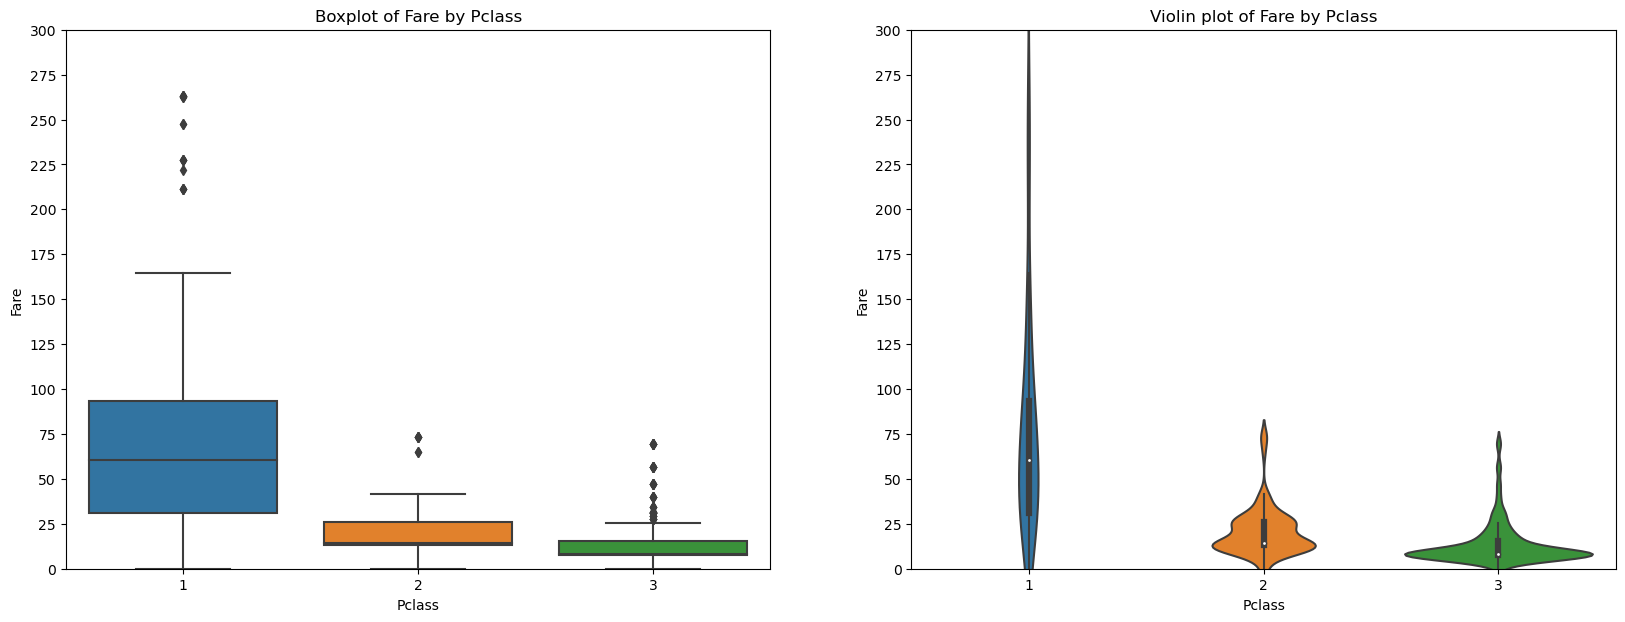

In [38]:
plt.figure(figsize=(20, 7))
yticks = np.arange(0, 325, 25)

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Boxplot of Fare by Pclass')
plt.ylim(0, 300)
plt.yticks(yticks)

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Pclass', y='Fare', data=data)
plt.title('Violin plot of Fare by Pclass')
plt.ylim(0, 300) 
plt.yticks(yticks)

plt.show()

In [39]:
mean_price_by_class = np.round(data.groupby('Pclass')['Fare'].mean(), 2).reset_index()
mean_price_by_class = mean_price_by_class.rename(columns={'Fare': 'Mean Fare'})
mean_price_by_class

,Pclass,Mean Fare
0,1,84.15
1,2,20.66
2,3,13.68


По определению боксплота, в закрашенную область входять 50% данных, по длине "коробки" мы можем оценить насколько большой разброс в данных.
Так мы видим, что разборс цен для первого класса гораздо выше других, в первом классе также есть выборсы, то есть очень дорогие билеты даже для 1 класса.В целом, цена билета примерно варируется от 30 до 90 с средним значением в 84.
Мы также видим подтверждение вывода из task 1, средняя цена на билет 1 класса гораздо выше других - 2 и 3, при этом 2 класс также в среднем дороже 3. Разброс по ценам среди 2 и 3 классов гораздо меньше 1 класса. Для 2 класса цены варируются от 15 до 30 и среднее 20.6, а 3 класс от 10 до 20 и средним значеним в 13.6.
\
Благодаря violin plot мы можем видеть, что у 2 и 3 третьего класса большинство значений скоплено вокруг медианы. То есть большинство купленных билетов в данных классах были по медианной цене. Для графика 1 класса можно сказать тоже самое, однако график получился более вытянутым из-за больших выбросов. 

Мы можем также посчитать корреляцию данных, тут важно понимать, что класса лучше с убыванием его номер, это важно для подсчёта корреляции.

In [40]:
correlation_value = (4-data['Pclass']).corr(data['Fare'])
corr = np.round(correlation_value, 3)
print("Корреляция между признаками Pclass и Fare: ", corr)

Корреляция между признаками Pclass и Fare:  0.549


Мы получаем умеренную прямую корреляцию между классом каюты и ценой билета, то есть когда класс места повышается (с 3 класса до 1 класса), то и цена на него возрастает. \
Таким образом, мы можем утверждать что существует корреляция, она подтверждается как прямыми вычислениями, так и графиками.

### **Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

В данном случае мы уже не сможем численно явно посчитать корреляцию между ценой (Fare) и портом посадки (Emarked), потому что порт является категориальной переменной.
Но мы всё ещё можем сделать выводы на основе графиков, а также применив метод внедрения фиктивных (dummy) переменных.

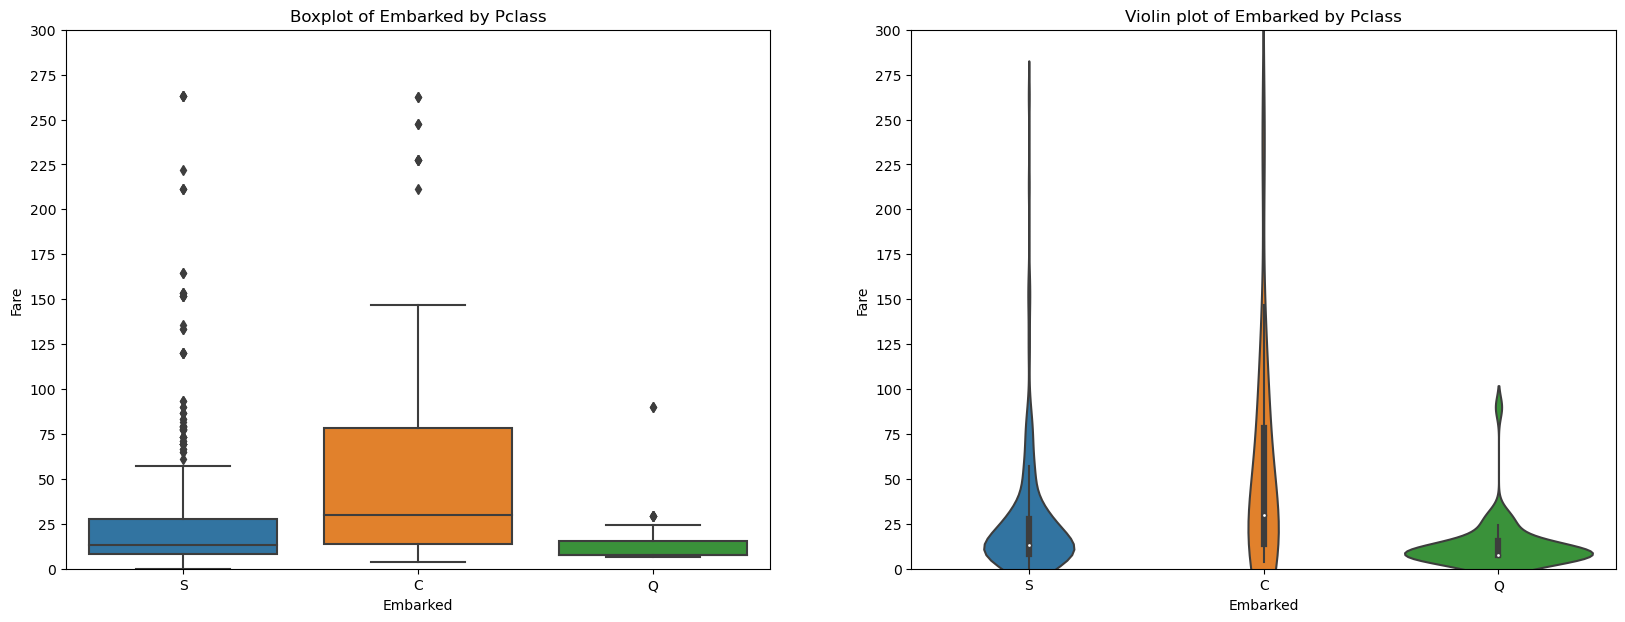

In [41]:
mean_price_by_class = data.groupby('Embarked')['Fare'].mean()

plt.figure(figsize=(20, 7))
yticks = np.arange(0, 325, 25)

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Embarked', y='Fare', data=data)
plt.title('Boxplot of Embarked by Pclass')
plt.ylim(0, 300)
plt.yticks(yticks)

# Violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Embarked', y='Fare', data=data)
plt.title('Violin plot of Embarked by Pclass')
plt.ylim(0, 300) 
plt.yticks(yticks)

plt.show()

На представленных графиках мы похожий паттерн в распределении цены и порта посадки, что мы видели на графике ранее, с зависимостью цены и класса каюты. \
По разбросам цены на графике boxplot и violinplot мы можем выстроить следующую зависимость:

In [42]:
class_port = {
    'Порт': ['Cherbourg', 'Queenstown', 'Southampton'],
    'Класс пассажиров': [1, 3, 2]
}

df_ports = pd.DataFrame(class_port)
df_ports

,Порт,Класс пассажиров
0,Cherbourg,1
1,Queenstown,3
2,Southampton,2


In [43]:
mean_price_by_class = np.round(data.groupby('Embarked')['Fare'].mean(), 2).reset_index()
mean_price_by_class = mean_price_by_class.rename(columns={'Fare': 'Mean Fare'})
mean_price_by_class

,Embarked,Mean Fare
0,C,59.95
1,Q,13.28
2,S,27.08


Однако если явно подсчитать среднюю стоймость по классам, то видно что зависимость Pclass - Embarked не совсем точная. Мы можем сделать вывод, что большинство пассажиров 1 класса заходила на корабль в порту Cherbourg, однако они могли и прибывать и из других портов. Например из порта Southampton, его среднее чуть выше, чем у пассажиров 2 класса.

Создадим копию данных и в ней создадим фиктивные переменные Embarked_C, Embarked_Q, Embarked_S, которые отображают категориальную переменную Embarked.

In [44]:
embarked_encoded = pd.get_dummies(data['Embarked'], prefix='Embarked')

encoded_dat = pd.concat([data, embarked_encoded], axis=1)
encoded_dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


Теперь мы можем подсчитать корреляцию между новыми характеристиками и значением цены билета. \
Почему мы можем это сделать, в нашем случае характеристки Embarked_C, Embarked_Q, Embarked_S имеют биномаиальное распределение, а Fare похоже имеет усечённое нормальное распредление с ограничением [0, +∞]

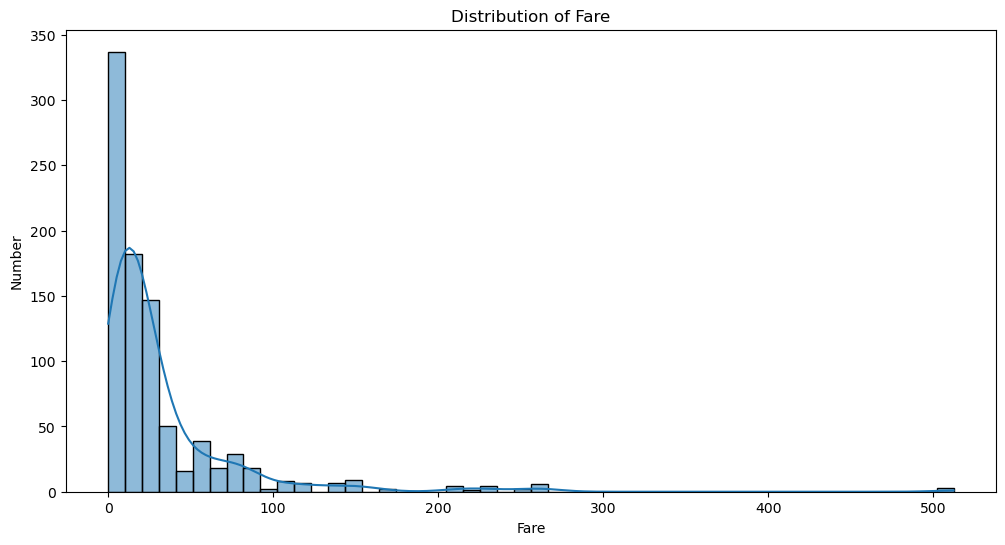

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Fare'], kde=True, bins=50)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Number')
plt.show()

In [46]:
correlations = encoded_dat[['Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].corr()
correlations_fare_embarked = correlations['Fare'][1:] 
correlations_fare_embarked.to_frame()

,Fare
Embarked_C,0.269335
Embarked_Q,-0.117216
Embarked_S,-0.166603


На основе данного подсчёта мы можем сделать следующие выводы о корреляции цены и порта: \
Cherbourg (C) - положительная корреляция, что указывает на то, что билеты, купленные пассажирами, посадившимися в Cherbourg, в среднем были дороже по сравнению с другими портами. \
Queenstown (Q) - небольшая отрицательная корреляция, указывающая на то, что билеты, купленные в Queenstown, в среднем были дешевле. \
Southampton (S) - также отрицательная корреляция, указывающая на то, что билеты, купленные в Southampton, в среднем были дешевле по сравнению с Cherbourg, но дороже по сравнению с Queenstown. \
\
Таким образом, мы наблюдаем зависимость между портом и ценой билета. Полученные результаты подтверждают, что средняя цена билета для пассажиров из Cherbourg была наивысшей, а для Southampton наименьшей.

### **Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

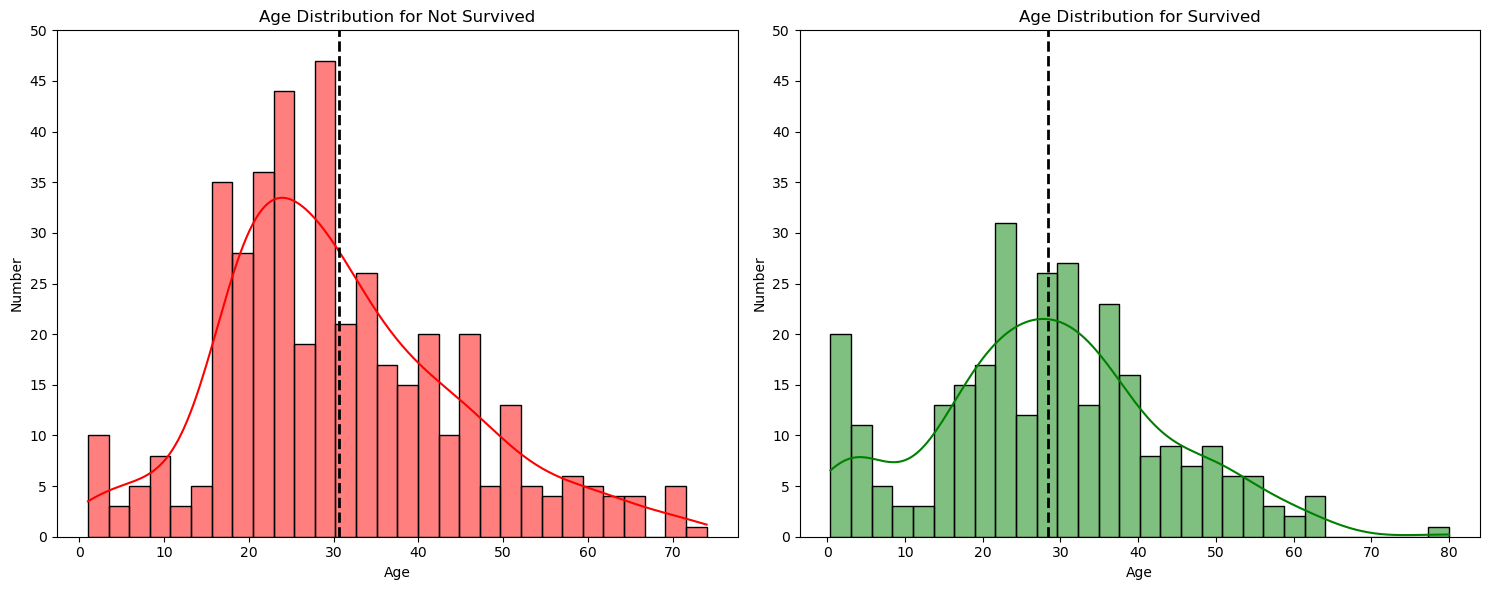

In [47]:
mean_age_survived = data[data['Survived'] == 1]['Age'].mean()
mean_age_not_survived = data[data['Survived'] == 0]['Age'].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.histplot(data[data['Survived'] == 0]['Age'], kde=True, color='red', bins=30, ax=axes[0])

axes[0].set_title('Age Distribution for Not Survived')
axes[0].axvline(mean_age_not_survived, color='black', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number')
axes[0].set_ylim(0, 40)
axes[0].set_yticks(list(range(0, 55, 5))) 

sns.histplot(data[data['Survived'] == 1]['Age'], kde=True, color='g', bins=30, ax=axes[1])
axes[1].set_title('Age Distribution for Survived')
axes[1].axvline(mean_age_survived, color='black', linestyle='dashed', linewidth=2)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Number')
axes[1].set_ylim(0, 40)
axes[1].set_yticks(list(range(0, 55, 5))) 

plt.tight_layout()
plt.show()


In [48]:
mean_age_data = {
    'Type': ['Survived', 'Not Survived'],
    'Mean Age': [
        data[data['Survived'] == 1]['Age'].mean(),
        data[data['Survived'] == 0]['Age'].mean()
    ]
}

mean_age_df = pd.DataFrame(mean_age_data)
mean_age_df

,Type,Mean Age
0,Survived,28.343690
1,Not Survived,30.626179


In [49]:
kids_saved_freq_all = data[(data['Age']<19) & (data['Survived']==1)].shape[0] / data[data['Survived']==1].shape[0]
kids_saved_freq = data[(data['Age']<19) & (data['Survived']==1)].shape[0] / data[data['Age']<19].shape[0]

print('Процент спасённых детей и подростков от общего числа выживших: ', np.round(kids_saved_freq_all, 3)*100)

print('Процент спасённых детей и подростков от их общего числа: ', np.round(kids_saved_freq, 3)*100)

Процент спасённых детей и подростков от общего числа выживших:  20.5
Процент спасённых детей и подростков от их общего числа:  50.4


Таким образом, мы видим что средний возраст выживших чуть ниже, чем погибших. К сожалению, видим, что среди выживших пассажиров умеренное количество детей, лишь половина из тех кто был на корабле смог выжить.

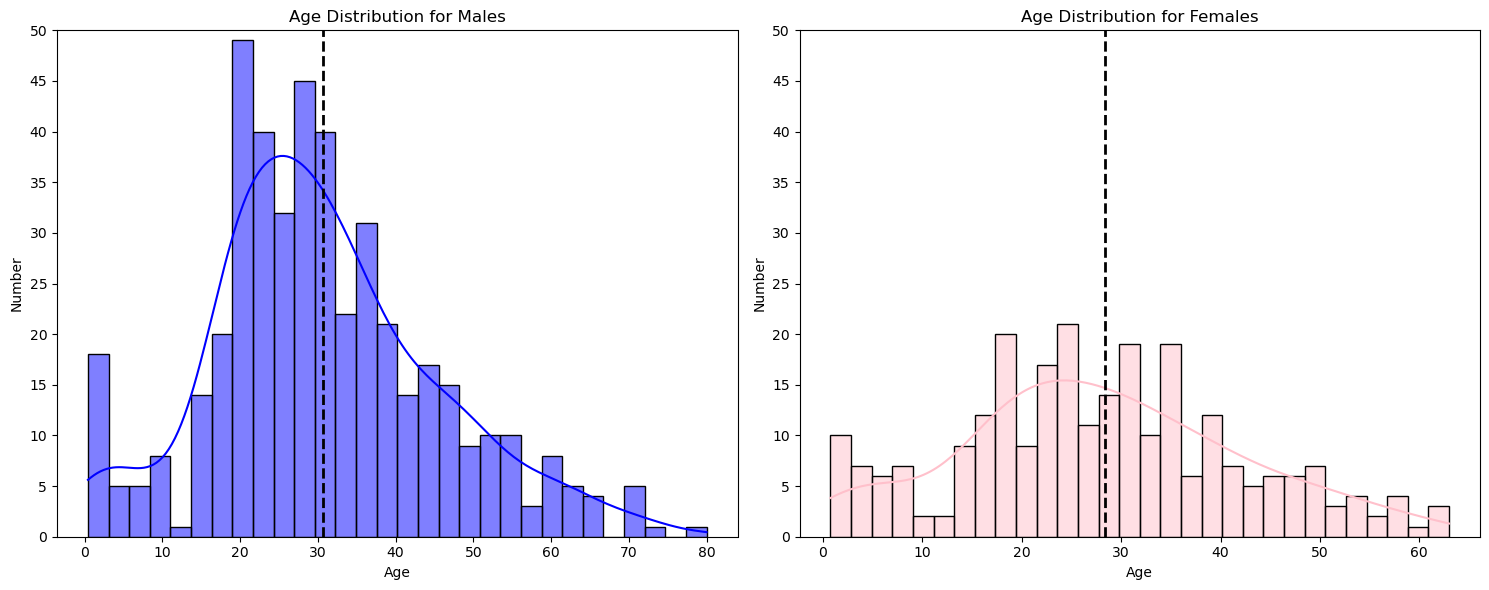

In [50]:
mean_age_male = data[data['Sex'] == 'male']['Age'].mean()
mean_age_female = data[data['Sex'] == 'female']['Age'].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.histplot(data[data['Sex'] == 'male']['Age'], kde=True, color='blue', bins=30, ax=axes[0])
axes[0].set_title('Age Distribution for Males')
axes[0].axvline(mean_age_not_survived, color='black', linestyle='dashed', linewidth=2)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number')
axes[0].set_ylim(0, 40)
axes[0].set_yticks(list(range(0, 55, 5))) 

sns.histplot(data[data['Sex'] == 'female']['Age'], kde=True, color='pink', bins=30, ax=axes[1])
axes[1].set_title('Age Distribution for Females')
axes[1].axvline(mean_age_survived, color='black', linestyle='dashed', linewidth=2)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Number')
axes[1].set_ylim(0, 40)
axes[1].set_yticks(list(range(0, 55, 5))) 

plt.tight_layout()
plt.show()


Распределение возрастов мужчин и женщин на "Титанике" было довольно схожим, с доминированием возрастной группы от 20 до 30 лет.
Средний возраст женщин был немного меньше, чем у мужчин.